In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn import svm
from sklearn.preprocessing import StandardScaler

<font size="5">Part 1 Modeling Wine Preferences</font>

In [3]:
wine = pd.read_csv("~/Downloads/winequality-red.csv",  delimiter=';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Preprocessing: Specify the predictors, X, and a single response variable, y. 
# Split the entire dataset into training and test sets
X = wine.iloc[:, 0:11]
y = wine['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
# Reset index for k fold cross validation
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

In [6]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [7]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

<font size="4">1. Ordinary least squares (OLS)</font>

In [8]:
# Insert a column of constant term into X.
X['constant'] = 1

In [9]:
# Create and fit regression model.
mod = sm.OLS(y, X).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Tue, 07 May 2019   Prob (F-statistic):          1.79e-145
Time:                        16:21:47   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.0250      0.026      0.963      0.336      -0.026       0.076
volatile acidity        -1.0836      0.121     -8.948      0.000      -1.321      -0.846
citric acid             -0.1826      0.147     -1.240      0.215      -0.471       0.106
residual sugar           0.0163      0.015      1.089      0.276      -0.013       0.046
chlorides               -1.8742      0.419     -4.470      0.000      -2.697      -1.052
free sulfur dioxide      0.0044      0.002      2.009      0.045       0.000       0.009
total sulfur dioxide    -0.0033      0.001     -4.480      0.000      -0.005      -0.002
density                -17.8812     21.633     -0.827      0.409     -60.314      24.551
pH                      -0.4137      0.192     -2.159      0.031      -0.789      -0.038
sulphates                0.9163      0.114      8.014      0.000       0.692       1.141
alcohol                  0.2762      0.026     10.429      0.000       0.224       0.328
constant                21.9652     21.195      1.036      0.300     -19.607      63.538
==============================================================================
Omnibus:                       27.376   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.965
Skew:                          -0.168   Prob(JB):                     1.27e-09
Kurtosis:                       3.708   Cond. No.                     1.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<font size="4">2. Ridge Regression (RR)</font>

In [10]:
# Set different values of tuning parameters to be tested
alpha_ridge = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10]

# Use k-fold cross-validation to select the best tuning parameter
k = 5
kf = KFold(n_splits=k)
ridge_cv_errors = []

for alpha in alpha_ridge:
    ridge_cv_error = 0
    ridge_mod = Ridge(alpha=alpha, normalize=True)
    for train_index, test_index in kf.split(X_train):
        Xval_train, Xval_test = X_train.iloc[train_index], X_train.iloc[test_index]
        yval_train, yval_test = y_train[train_index], y_train[test_index]
        ridge_mod.fit(Xval_train, yval_train)
        yval_pred = ridge_mod.predict(Xval_test)
        ridge_cv_error += mean_squared_error(yval_pred, yval_test)
    ridge_cv_errors.append(ridge_cv_error/k)
ridge_cv_errors

[0.4232039646693998,
 0.4231506015902179,
 0.4227089572124204,
 0.42216058544653556,
 0.454848669399558,
 0.5822780356258365]

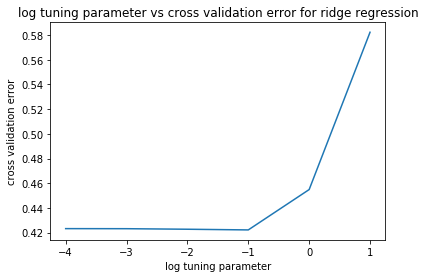

In [11]:
# Plot of tuning parameters vs cross validation error
plt.figure()
plt.xlabel("log tuning parameter")
plt.ylabel('cross validation error')
plt.plot(np.log10(alpha_ridge), ridge_cv_errors)
plt.title("log tuning parameter vs cross validation error for ridge regression")
plt.show()

In [12]:
min_error = min(ridge_cv_errors)
print("Mininum corss-validation error is " + str(min_error))

Mininum corss-validation error is 0.42216058544653556


In [13]:
# best tuning parameter alpha that minimizes error
ridge_alpha_star = alpha_ridge[ridge_cv_errors.index(min(ridge_cv_errors))]
ridge_alpha_star

0.1

In [14]:
# Fit the ridge regression model on the entire training set and get its coefficients
ridge_model = Ridge(alpha = ridge_alpha_star).fit(X_train, y_train)
ridge_model.coef_

array([ 0.02264188, -1.05421816, -0.2979905 ,  0.00907543, -1.79741479,
        0.00508981, -0.00335932, -0.28792004, -0.3703015 ,  0.96664646,
        0.29339518])

In [15]:
# intercept of the ridge regression model
ridge_model.intercept_

4.103697661927534

In [16]:
# test the accuracy of the model on our test set
ridge_model.score(X_test, y_test)

0.36560855032947437

<font size="4">3. Lasso Regression</font>

In [17]:
# Set different values of tuning parameters to be tested
alpha_lasso = [1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1, 10]

# Use k-fold cross-validation to select the best tuning parameter
k = 5
kf = KFold(n_splits=k)
lasso_cv_errors = []

for alpha in alpha_lasso:
    lasso_cv_error = 0
    lasso_mod = Lasso(alpha=alpha, normalize=True)
    for train_index, test_index in kf.split(X_train):
        Xval_train, Xval_test = X_train.iloc[train_index], X_train.iloc[test_index]
        yval_train, yval_test = y_train[train_index], y_train[test_index]
        lasso_mod.fit(Xval_train, yval_train)
        yval_pred = lasso_mod.predict(Xval_test)
        lasso_cv_error += mean_squared_error(yval_pred, yval_test)
    lasso_cv_errors.append(lasso_cv_error/k)
lasso_cv_errors

[0.4232099695657808,
 0.4231694499031443,
 0.42338535077899897,
 0.42755253489694256,
 0.5957839333882375,
 0.6407190885614846,
 0.6407190885614846]

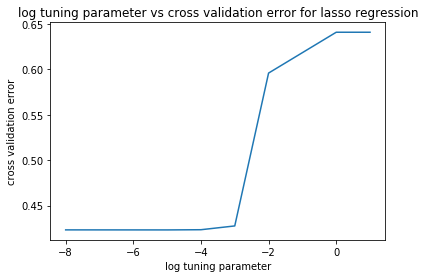

In [18]:
# Plot of tuning parameter vs cross validation error
plt.figure()
plt.xlabel("log tuning parameter")
plt.ylabel('cross validation error')
plt.plot(np.log10(alpha_lasso), lasso_cv_errors)
plt.title("log tuning parameter vs cross validation error for lasso regression")
plt.show()

In [19]:
min_error = min(lasso_cv_errors)
print("Mininum corss-validation error is " + str(min_error))

Mininum corss-validation error is 0.4231694499031443


In [20]:
# best tuning parameter alpha that minimizes error
lasso_alpha_star = alpha_lasso[lasso_cv_errors.index(min(lasso_cv_errors))]
lasso_alpha_star

1e-05

In [21]:
# Fit the lasso regression model on the entire training set and get its coefficients
lasso_model = Lasso(alpha = lasso_alpha_star).fit(X_train, y_train)
lasso_model.coef_

array([ 4.25628749e-02, -1.03201396e+00, -2.91420976e-01,  1.83853399e-02,
       -1.84447527e+00,  4.89059040e-03, -3.29959813e-03, -2.22201283e+01,
       -2.70696551e-01,  1.00897417e+00,  2.72734521e-01])

In [22]:
lasso_model.intercept_

25.624083670223094

In [23]:
# test the accuracy of the model on our test set
lasso_model.score(X_test, y_test)

0.36281349321480805

<font size="4">4. Elastic Net</font>

In [24]:
# Set different values of alpha and l1_ratio parameters to be tested
alpha_elasticnet = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]
l1_ratios = [.1, .5, .7, .9, .95, .99, 1]

In [25]:
# Use k-fold cross-validation to select the best tuning parameters
k = 5
kf = KFold(n_splits=k)
elastic_cv_errors = []

for alpha in alpha_elasticnet:
    elastic_cv_error_per_alpha = []
    for l1_ratio in l1_ratios:
        elastic_mod = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, normalize=True)
        l1_score = 0
        for train_index, test_index in kf.split(X_train):
            Xval_train, Xval_test = X_train.iloc[train_index], X_train.iloc[test_index]
            yval_train, yval_test = y_train[train_index], y_train[test_index]
            elastic_mod.fit(Xval_train, yval_train)
            yval_pred = elastic_mod.predict(Xval_test)
            l1_score += mean_squared_error(yval_pred, yval_test)
        elastic_cv_error_per_alpha.append(l1_score/k)
    elastic_cv_errors.append(elastic_cv_error_per_alpha)
elastic_cv_errors

[[0.4227433147048618,
  0.4229140171038151,
  0.423010719498606,
  0.423114552304395,
  0.423141789034843,
  0.4231638922179054,
  0.4231694499031443],
 [0.4221486332583034,
  0.42221979087891903,
  0.4224833594027314,
  0.42304120144032986,
  0.42320562728280675,
  0.4233487669355223,
  0.42338535077899897],
 [0.4532683138267169,
  0.44164674634012185,
  0.4349862842799803,
  0.42938584611481795,
  0.4283130884636287,
  0.42767355616216635,
  0.42755253489694256],
 [0.5860221264825913,
  0.6005591749119038,
  0.603170047683096,
  0.605314668418689,
  0.6028867563786712,
  0.597720851479255,
  0.5957839333882375],
 [0.6401924527774996,
  0.6407190885614846,
  0.6407190885614846,
  0.6407190885614846,
  0.6407190885614846,
  0.6407190885614846,
  0.6407190885614846],
 [0.6407190885614846,
  0.6407190885614846,
  0.6407190885614846,
  0.6407190885614846,
  0.6407190885614846,
  0.6407190885614846,
  0.6407190885614846],
 [0.6407190885614846,
  0.6407190885614846,
  0.6407190885614846,
  

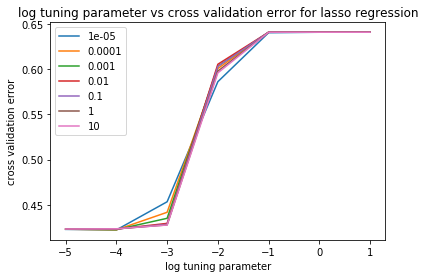

In [26]:
plt.figure()
plt.xlabel("log tuning parameter")
plt.ylabel('cross validation error')
plt.plot(np.log10(alpha_elasticnet), elastic_cv_errors)
plt.legend(alpha_elasticnet)
plt.title("log tuning parameter vs cross validation error for lasso regression")
plt.show()

In [27]:
# flatten the list of list errors in order to find the minimum error
flattened_errors = np.array(elastic_cv_errors).flatten()

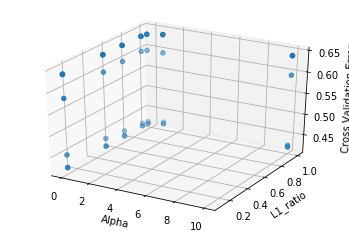

In [28]:
from mpl_toolkits.mplot3d import Axes3D
threed = plt.figure().gca(projection='3d')
threed.scatter(alpha_elasticnet * len(l1_ratios), l1_ratios * len(alpha_elasticnet), flattened_errors)
threed.set_xlabel('Alpha')
threed.set_ylabel('L1_ratio')
threed.set_zlabel('Cross Validation Error')
plt.show()

In [29]:
min_error = min(flattened_errors)
print("Mininum corss-validation error is " + str(min_error))

Mininum corss-validation error is 0.4221486332583034


In [30]:
# best tuning parameters alpha and l1_ratio that minimize error
alpha_index, l1_ratio_index = np.unravel_index(np.argmin(elastic_cv_errors), np.array(elastic_cv_errors).shape)
elastic_alpha_star, elastic_l1_ratio_star = alpha_elasticnet[alpha_index], l1_ratios[l1_ratio_index]
print(elastic_alpha_star, elastic_l1_ratio_star)

0.0001 0.1


In [31]:
# Fit the elastic net model on the entire training set and get its coefficients
elastic_model = ElasticNet(alpha=elastic_alpha_star, l1_ratio=elastic_l1_ratio_star, normalize=True).fit(X_train, y_train)
elastic_model.coef_

array([ 4.21814303e-02, -8.95486548e-01, -6.60468353e-02,  2.10649079e-02,
       -1.71150714e+00,  3.57121174e-03, -2.98518574e-03, -3.81267494e+01,
       -1.41166251e-01,  9.18182713e-01,  2.31496777e-01])

In [32]:
elastic_model.intercept_

41.39761835820917

In [33]:
# test the accuracy of the model on our test set
elastic_model.score(X_test, y_test)

0.36201015390669344

<font size="5">Part 2 Modeling Annual Spending on Products</font>

In [34]:
customers = pd.read_csv("~/Downloads/wholesale-customers.csv",  delimiter=',')
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [35]:
# Predata processing: Specify the predictors, X, and a single response variable, y.
y = customers['Channel']
X = customers.iloc[:, 2:8]

In [36]:
X.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [37]:
# Convert int object to float for later feature scaling
X = X.astype(np.float64)

In [38]:
y.head()

0    2
1    2
2    2
3    1
4    2
Name: Channel, dtype: int64

<font size="4">1. Linear SVM</font>

In [39]:
# don't do the train-test split for SVM, otherwise same.

In [40]:
# Set different values of tuning parameters to be tested
alpha_linearsvm = [1e-3, 1e-2, 1e-1, 1, 10, 100]

# Use k-fold cross-validation to select the best tuning parameter
k = 5
kf = KFold(n_splits=k)
linearsvm_cv_errors = []
sc_X = StandardScaler()
for alpha in alpha_linearsvm:
    linearsvm_cv_error = 0
    clf = svm.SVC(C=alpha, kernel='linear', tol=1e-5, max_iter=1000000)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # Feature Scaling
        X_train = sc_X.fit_transform(X_train)
        X_test = sc_X.transform(X_test)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        linearsvm_cv_error += mean_squared_error(y_pred, y_test)
    linearsvm_cv_errors.append(linearsvm_cv_error/k)
linearsvm_cv_errors

[0.29772727272727273,
 0.14545454545454545,
 0.10227272727272727,
 0.09772727272727273,
 0.09772727272727273,
 0.09772727272727273]

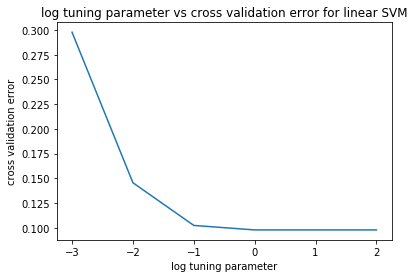

In [41]:
# Plot of tuning parameters vs cross validation error
plt.figure()
plt.xlabel("log tuning parameter")
plt.ylabel('cross validation error')
plt.plot(np.log10(alpha_linearsvm), linearsvm_cv_errors)
plt.title("log tuning parameter vs cross validation error for linear SVM")
plt.show()

In [42]:
min_error = min(linearsvm_cv_errors)
print("Mininum corss-validation error is " + str(min_error))

Mininum corss-validation error is 0.09772727272727273


In [43]:
# best tuning parameter alpha that minimizes error
linearsvm_alpha_star = alpha_linearsvm[linearsvm_cv_errors.index(min(linearsvm_cv_errors))]
linearsvm_alpha_star

1

In [44]:
# coefficients of the linear svm model
sc_X = StandardScaler()
X_standard = sc_X.fit_transform(X)
clf = svm.SVC(C = linearsvm_alpha_star, kernel='linear', tol=1e-5, max_iter=1000000).fit(X_standard, y)
clf.coef_

array([[ 0.03656086,  0.21870077,  0.53163381, -0.40728466,  2.42933436,
        -0.15346411]])

In [45]:
# Coefficients of the linear svm related to features
linearsvm_coefficients = {}
for i in range(len(X.columns)):
    linearsvm_coefficients[X.columns[i]] = clf.coef_[0][i]
linearsvm_coefficients

{'Fresh': 0.036560855748344334,
 'Milk': 0.21870077212003913,
 'Grocery': 0.5316338100176379,
 'Frozen': -0.4072846560315776,
 'Detergents_Paper': 2.429334362272093,
 'Delicassen': -0.15346410834679586}

In [46]:
clf.intercept_

array([-0.07388778])

In [47]:
clf.score(X_standard, y)

0.9090909090909091

<font size="4">2. SVM with Polynomial Kernel</font>

In [67]:
# Set different values of tuning parameters to be tested
alpha_polysvm = [1e-2, 1e-1, 1, 10, 100, 1000, 10000]
# degree????????

# Use k-fold cross-validation to select the best tuning parameter
k = 5
kf = KFold(n_splits=k)
polysvm_cv_errors = []
sc_X = StandardScaler()
for alpha in alpha_polysvm:
    polysvm_cv_error = 0
    clf = svm.SVC(C=alpha, kernel='poly', tol=1e-5, max_iter=1000000)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # Feature Scaling
        X_train = sc_X.fit_transform(X_train)
        X_test = sc_X.transform(X_test)
        
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        polysvm_cv_error += mean_squared_error(y_pred, y_test)
    polysvm_cv_errors.append(polysvm_cv_error/k)
polysvm_cv_errors

[0.2909090909090909,
 0.24545454545454545,
 0.19545454545454544,
 0.15227272727272728,
 0.14772727272727276,
 0.1318181818181818,
 0.1431818181818182]

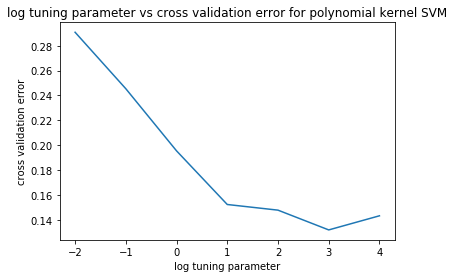

In [68]:
# Plot of tuning parameters vs cross validation error
plt.figure()
plt.xlabel("log tuning parameter")
plt.ylabel('cross validation error')
plt.plot(np.log10(alpha_polysvm), polysvm_cv_errors)
plt.title("log tuning parameter vs cross validation error for polynomial kernel SVM")
plt.show()

In [69]:
min_error = min(polysvm_cv_errors)
print("Mininum corss-validation error is " + str(min_error))

Mininum corss-validation error is 0.1318181818181818


In [70]:
# best tuning parameter alpha that minimizes error
polysvm_alpha_star = alpha_polysvm[polysvm_cv_errors.index(min(polysvm_cv_errors))]
polysvm_alpha_star

1000

In [71]:
# intercept of SVM with polynomial kernel
sc_X = StandardScaler()
X_standard = sc_X.fit_transform(X)
polyclf = svm.SVC(C = polysvm_alpha_star, tol=1e-5, max_iter=1000000).fit(X_standard, y)
polyclf.intercept_

array([-1.71142577])

In [72]:
polyclf.score(X_standard, y)

0.9727272727272728

<font size="4">3. SVM with Gaussian Kernel</font>

In [54]:
# Set different values of tuning parameters to be tested
alpha_gaussiansvm = [1e-3, 1e-2, 1e-1, 1, 10, 1000]

# Use k-fold cross-validation to select the best tuning parameter
k = 5
kf = KFold(n_splits=k)
gaussiansvm_cv_errors = []
sc_X = StandardScaler()
for alpha in alpha_gaussiansvm:
    gaussiansvm_cv_error = 0
    clf = svm.SVC(C=alpha, kernel='rbf', tol=1e-5, max_iter=100000)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # Feature Scaling
        X_train = sc_X.fit_transform(X_train)
        X_test = sc_X.transform(X_test)
        
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        gaussiansvm_cv_error += mean_squared_error(y_pred, y_test)
    gaussiansvm_cv_errors.append(gaussiansvm_cv_error/k)
gaussiansvm_cv_errors

[0.3227272727272727,
 0.3227272727272727,
 0.1272727272727273,
 0.08636363636363638,
 0.08863636363636364,
 0.15227272727272725]

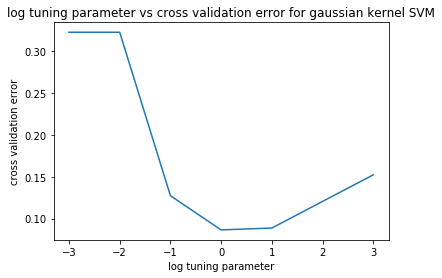

In [55]:
# Plot of tuning parameters vs cross validation error
plt.figure()
plt.xlabel("log tuning parameter")
plt.ylabel('cross validation error')
plt.plot(np.log10(alpha_gaussiansvm), gaussiansvm_cv_errors)
plt.title("log tuning parameter vs cross validation error for gaussian kernel SVM")
plt.show()

In [56]:
min_error = min(gaussiansvm_cv_errors)
print("Mininum corss-validation error is " + str(min_error))

Mininum corss-validation error is 0.08636363636363638


In [57]:
# best tuning parameter alpha that minimizes error
gaussiansvm_alpha_star = alpha_gaussiansvm[gaussiansvm_cv_errors.index(min(gaussiansvm_cv_errors))]
gaussiansvm_alpha_star

1

In [58]:
# intercept of SVM with polynomial kernel
sc_X = StandardScaler()
X_standard = sc_X.fit_transform(X)
gaussianclf = svm.SVC(C = gaussiansvm_alpha_star, tol=1e-5, max_iter=1000000).fit(X_standard, y)
gaussianclf.intercept_

array([-0.18586792])

In [59]:
gaussianclf.score(X_standard, y)

0.9340909090909091

In [ ]:
# Confusions:
# no cross validation for OLS?
# should we use C, the penalty parameter for tuning in svm.SVC?   For polynomial, there is the degree parameter and also the gamma.